## Task 2
**Prompt:** Based on the database created from task 1, design an UI where user can choose any protein from any dataset to visualize the protein expression in different groups, e.g. display a barplot of protein expression in the two groups (G1, G2) for protein 1 in dataset1

**Author:** Lauren Enriquez

**Notes:** Graphs generated are stored in folder "Output_Files_Graphs" as .png files

In [1]:
# Wrappers for supported file formats
import string
import sqlite3
import pandas as pd
from sqlite3 import Error
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
# Establishes connection to SQL database
conn = sqlite3.connect('Mass_Spec_Database.db')
c = conn.cursor()

In [3]:
# INPUT: User is asked to select a Protein provided in the list
print("Protein:\nP1\nP2\nP3\nP4\nP5\nP6\nP7\nP8\n")
protein = str(input("Select Protein: "))
while protein not in ['P1','P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8']:
    if protein in ['P1','P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8']:
        break
    #If user inputs an invalid request, another Protein selection is asked
    else: 
        print("Error!")
        protein = str(input("Select Protein: "))

        
# INPUT: User is asked to select which Dataset they want to analyze
dataset = str(input("Dataset 1 (D1) or Dataset 2 (D2)?: "))
while protein not in ['D1','D2']:
    #Checks to see if Protein sample is within the database the user input
    if dataset == 'D2':
        if protein in ['P1','P2', 'P3', 'P4', 'P5', 'P6']:
            break;
    if dataset == 'D1':
        if protein in ['P1','P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8']:
            break;
    #If user inputs an invalid request, another Database selection is asked
    else: 
        print("Error! This is not a Dataset avaiable")
        protein = str(input("Select Dataset: "))

Protein:
P1
P2
P3
P4
P5
P6
P7
P8

Select Protein: P8
Dataset 1 (D1) or Dataset 2 (D2)?: D1


In [4]:
# Function to determine the color assignments for each Sample (depending on the Group it is associated with)
# Inputs required: dataset variable
def group_colors(dataset):
    if dataset == 'D1':
        samples = """SELECT * FROM Dataset1_GroupInfo"""
    else:
        samples = """SELECT * FROM Dataset2_GroupInfo"""
      
    i = 0;
    a = []
    
    # Iterates through GroupInfo from the correct Dataset and assigns it a color (based on the GroupID)
    for row in c.execute(samples):
        G = row[1];
        if G == "G1":
            a.append("blue")
        
        if G == "G2":
            a.append("orange")
        i += 1
    
    # OUTPUT: an array with the correct color assignments for each sample (organized by index)
    return (a)

In [5]:
# Function to create and save a graph the data the user selects
# Inputs required: protein and dataset variables
def Create_Graph (protein, dataset):
    # Acquires the correct data the user selects, depending on the dataset and the protein
    if dataset == 'D1':
        data = """SELECT S1,S2,S3,S4,S5,S6 FROM Dataset1_RawData WHERE Protein=?"""
        # Creates graph labels
        labels = ["S1","S2","S3","S4","S5","S6"]
       
    else:
        data = """SELECT SS1,SS2,SS3,SS4,SS5,SS6,SS7,SS8 FROM Dataset2_RawData WHERE Protein=?"""
        # Creates graph labels
        labels = ["SS1","SS2","SS3","SS4","SS5","SS6", "SS7", "SS8"]
    
    # Acquires correct data that user selects, stores information in an array
    c.execute(data,(protein,))
    data = []
    data = c.fetchone()
    
    # Calls group_colors function to aquire the correct color assignments for the samples from the correct dataset
    z = group_colors(dataset)
    
    # Creates legend elements to be displayed on graph
    legend_elements = [Line2D([0], [0], color='blue', lw=7, label='G1'),
                       Line2D([0], [0], color='orange', lw=7, label='G2')]
    
    # Alters Graph's figure size
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 10
    fig_size[1] = 8
    plt.rcParams["figure.figsize"] = fig_size
    
    # Builds graph based on user inputs, the data array, and legend_elements 
    fig, ax = plt.subplots()
    
    # Adds labels for each bar from correct dataset and alters bargraph width
    x = np.arange(len(labels))
    width = 0.35
    
    # Creates graph labels & legend
    ax.set_ylabel('Mass')
    ax.set_title("Dataset " + dataset + " Protein " + protein)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.8))
    
    # Create Function to add the LC-MS reading ("height") above each bar
    def autolabel(rects):
     #Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
            
    # Calls autolabel to add LC-MS reading above the generated bar graph.
    autolabel(plt.bar(x,data, color = z))
    
    # OUTPUT: Display graph
    plt.show()
    
    # SAVED OUTPUT: Saves output image as an .png in the "Output_Files_Graphs" folder
    fig.savefig('Output_Files_Graphs/Dataset ' + dataset + " Protein " + protein + ' Results.png')
    
    # OUTPUT: Display graph
    return(plt.show())


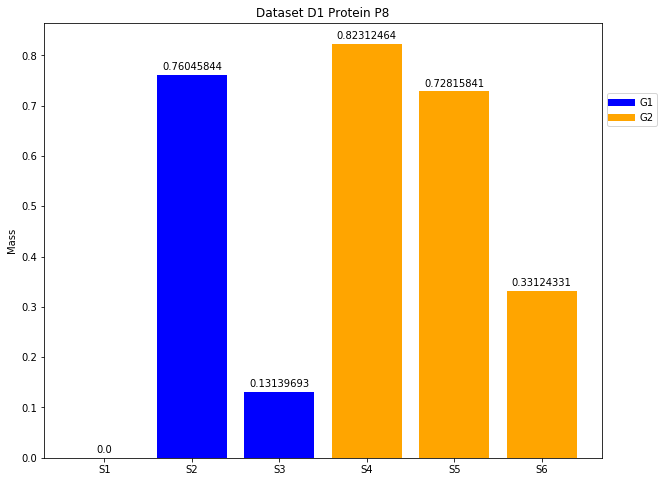

In [6]:
# Execution: Function to create the graph is called using the inputs the user provided
Create_Graph(protein,dataset)
conn.commit()

In [ ]:
# Closes connection to SQL database 
c.close()